<b>HEART ATTACK RISK PREDICTION</b>

<b>Main Aim Of The Project</b>

The primary aim of this project is to design and implement an intelligent machine learning-based system that can accurately predict the risk of a heart attack in individuals by analyzing key medical parameters such as age, cholesterol levels, blood pressure, and heart rate. As cardiovascular diseases continue to rise globally, early detection and prevention have become more crucial than ever. This system seeks to uncover meaningful patterns from historical health data, assisting healthcare professionals in making informed decisions and enabling them to prioritize at-risk patients efficiently. At the same time, it empowers individuals by offering insights into their heart health, encouraging timely lifestyle changes and preventive measures. Ultimately, this project strives to bridge the gap between technology and healthcare, providing a practical and impactful solution that contributes to reducing the incidence of heart-related complications and potentially saving lives.



<b>Objectives</b>

<b>To collect and preprocess medical data</b> containing relevant health indicators such as age, cholesterol, blood pressure, chest pain type, resting ECG results, and other important parameters related to heart health.

<b>To explore and analyze the dataset</b> to identify patterns, trends, and correlations among different features that contribute to the risk of a heart attack.

<b>To build and train machine learning models</b> (such as Logistic Regression, Random Forest, or Support Vector Machine) that can accurately classify individuals based on their likelihood of experiencing a heart attack.

<b>To evaluate the performance of the models</b> using metrics like accuracy, precision, recall, F1-score, and ROC-AUC to determine the most effective algorithm for risk prediction.

<b>To create a system that aids in early diagnosis</b>, helping both individuals and healthcare professionals make informed, preventive decisions and potentially reduce the number of critical cardiac events.

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
df = pd.read_csv("heart.csv")

In [9]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
X = df.drop('target', axis=1)
y = df['target']

<b>What are the summary statistics of the dataset used for heart attack risk prediction and What is the distribution of target classes</b>

              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.9051

<Axes: xlabel='target', ylabel='count'>

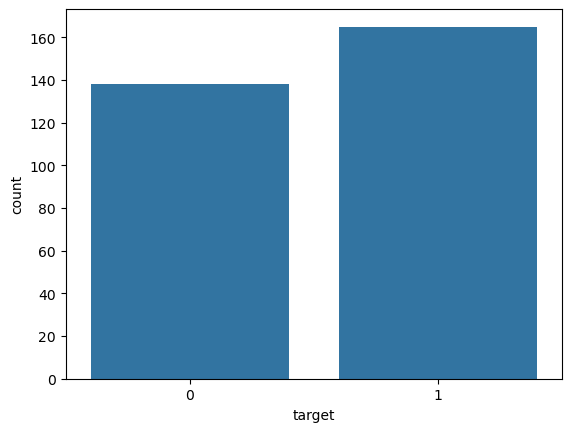

In [5]:
print(df.describe())
print(df.info())
sns.countplot(x='target', data=df)


In [4]:
print(df.isnull().sum())


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  #data splitting

In [20]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [21]:
y_pred = model.predict(X_test)


<b>What is the correlation between the different features in the dataset, and how do they relate to heart disease risk?</b>

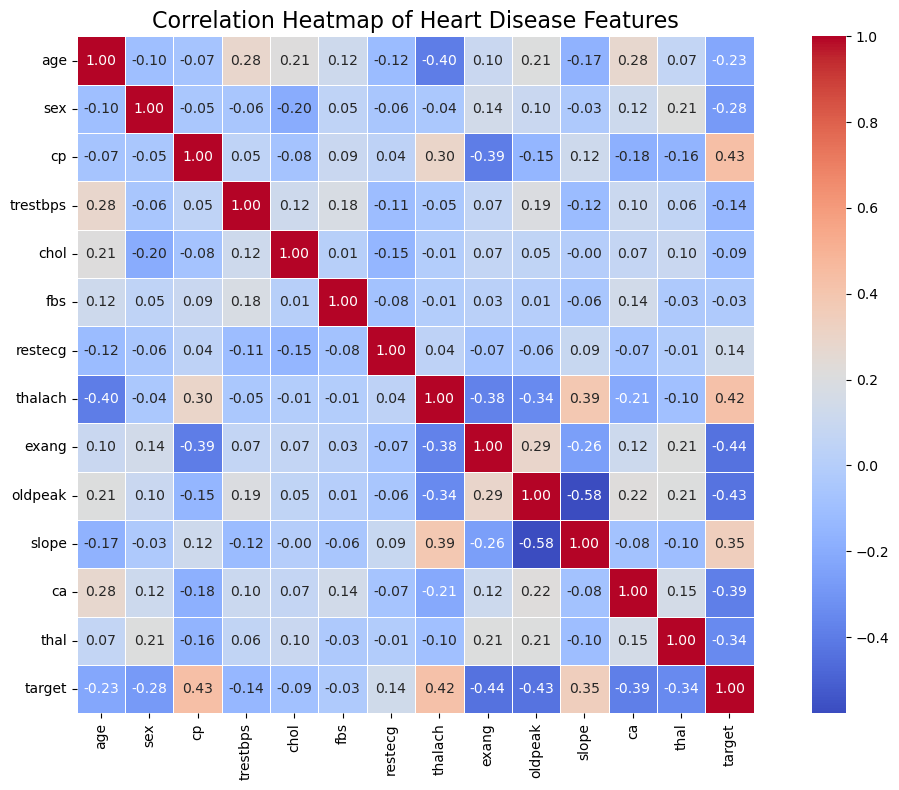

In [10]:
plt.figure(figsize=(12, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=.5)
plt.title("Correlation Heatmap of Heart Disease Features", fontsize=16)
plt.tight_layout()
plt.show()

<b>What is the distribution of gender and heart disease status in the dataset?</b>

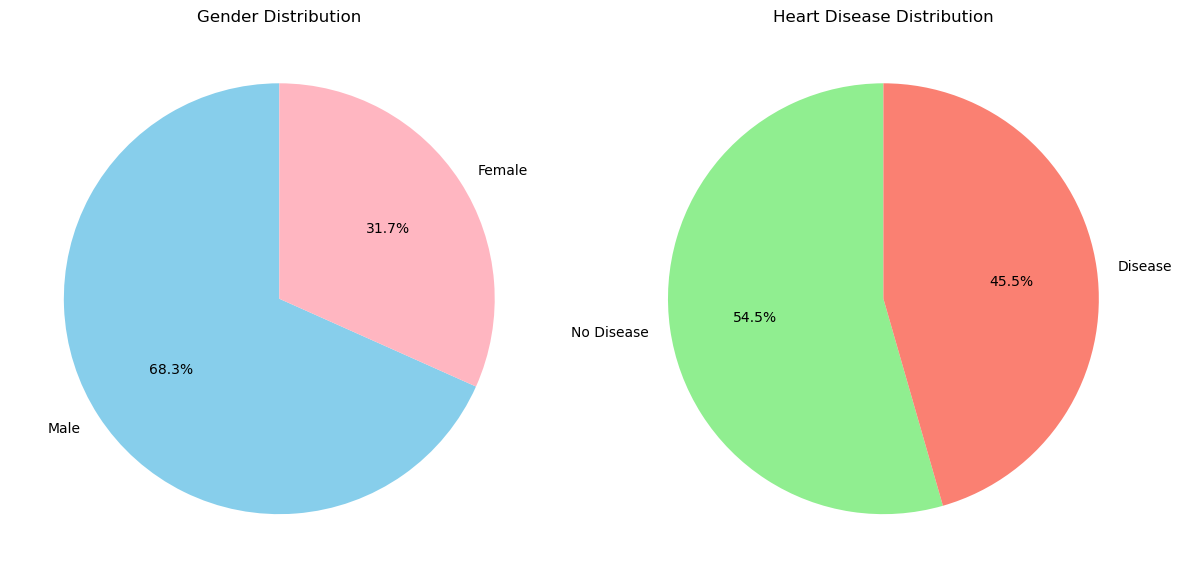

In [11]:

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

gender_counts = df['sex'].value_counts()
axs[0].pie(gender_counts, labels=['Male', 'Female'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightpink'])
axs[0].set_title('Gender Distribution')
target_counts = df['target'].value_counts()
axs[1].pie(target_counts, labels=['No Disease', 'Disease'], autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'salmon'])
axs[1].set_title('Heart Disease Distribution')

plt.tight_layout()
plt.show()


<b>How do different medical parameters (Max Heart Rate, ST Depression, Cholesterol, Resting BP) vary with heart disease status?</b>


C:\Users\91911\AppData\Local\Temp\ipykernel_10036\3828182282.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y='thalach', data=df, ax=axs[0, 0], palette="Set2")
C:\Users\91911\AppData\Local\Temp\ipykernel_10036\3828182282.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y='oldpeak', data=df, ax=axs[0, 1], palette="Set3")
C:\Users\91911\AppData\Local\Temp\ipykernel_10036\3828182282.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y='chol', data=df, ax=axs[1, 0], palette="Set1")
C:\Users\91911\AppD

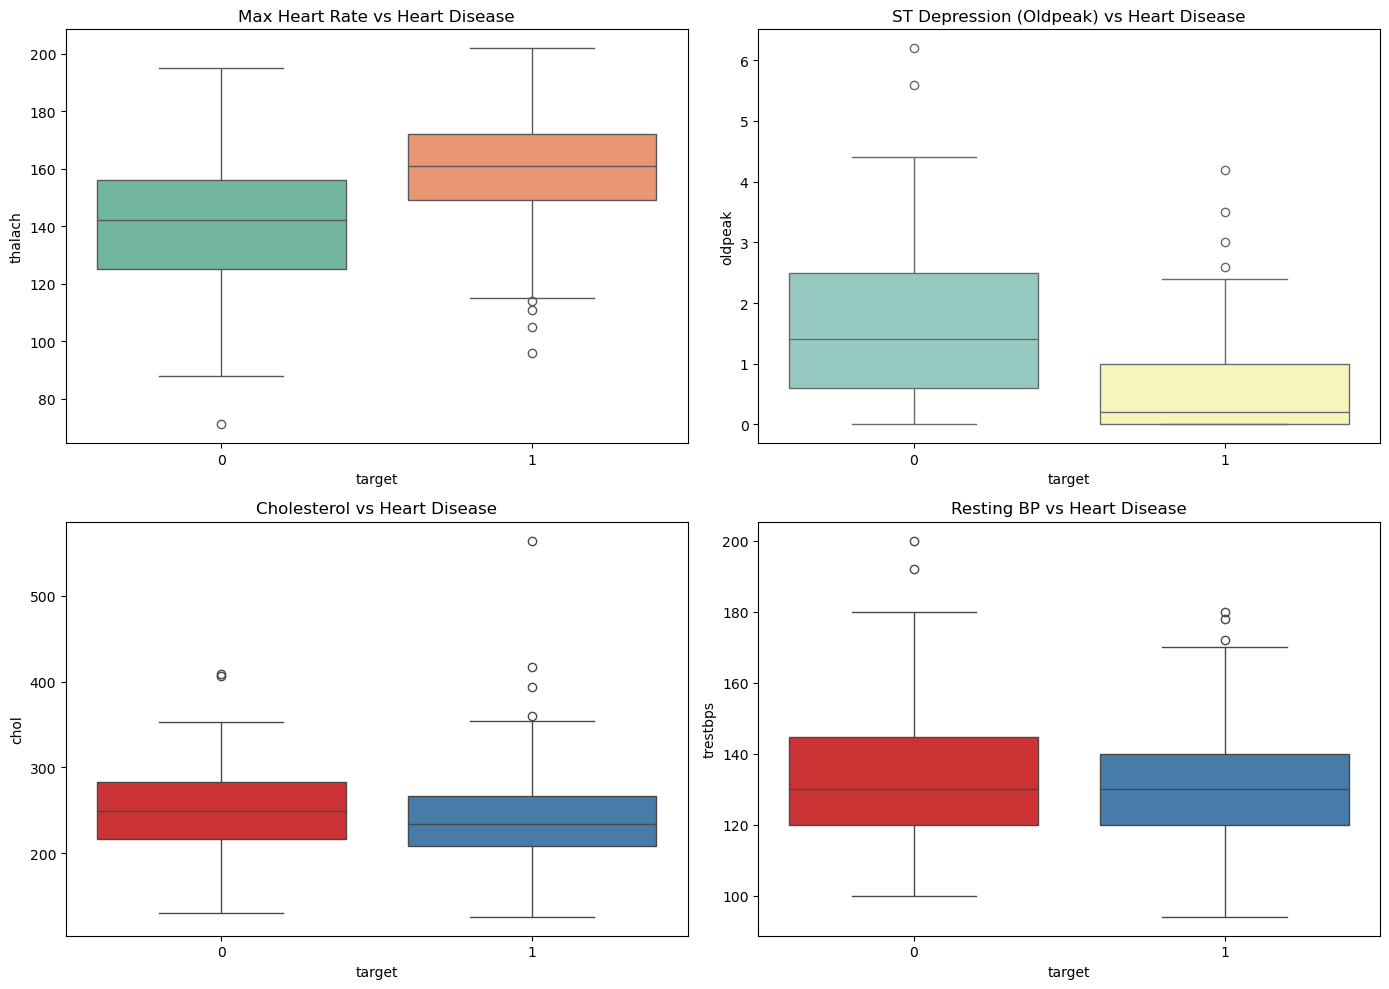

In [12]:
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
sns.boxplot(x='target', y='thalach', data=df, ax=axs[0, 0], palette="Set2")
axs[0, 0].set_title('Max Heart Rate vs Heart Disease')
sns.boxplot(x='target', y='oldpeak', data=df, ax=axs[0, 1], palette="Set3")
axs[0, 1].set_title('ST Depression (Oldpeak) vs Heart Disease')
sns.boxplot(x='target', y='chol', data=df, ax=axs[1, 0], palette="Set1")
axs[1, 0].set_title('Cholesterol vs Heart Disease')
sns.boxplot(x='target', y='trestbps', data=df, ax=axs[1, 1], palette="Set1")
axs[1, 1].set_title('Resting BP vs Heart Disease')
plt.tight_layout()
plt.show()


<b>What are the relationships between selected features (age, max heart rate, ST depression, cholesterol) and heart disease status?</b>

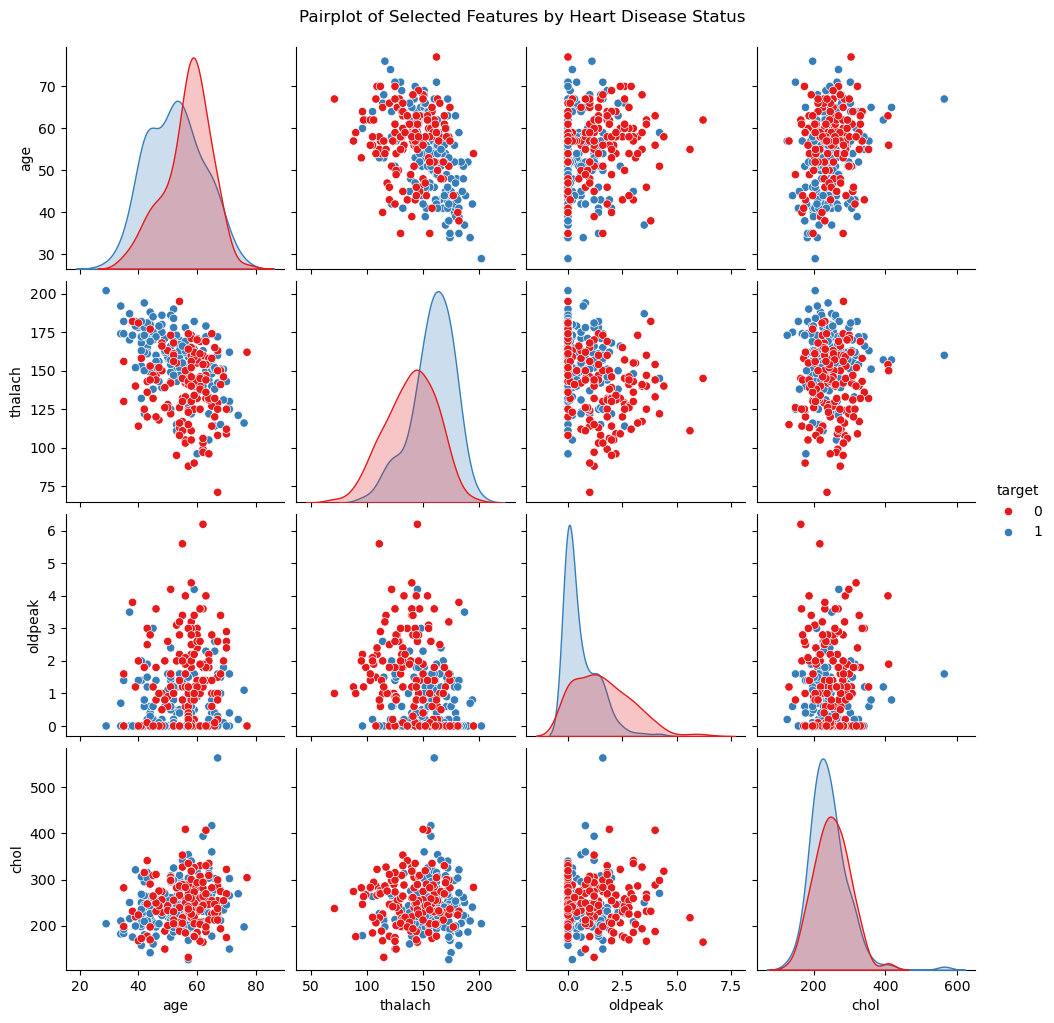

In [13]:
selected_features = ['age', 'thalach', 'oldpeak', 'chol', 'target']
sns.pairplot(df[selected_features], hue='target', palette='Set1', diag_kind='kde')
plt.suptitle('Pairplot of Selected Features by Heart Disease Status', y=1.02)
plt.show()


<b>Display the comparison between actual data and predicted data?</b>

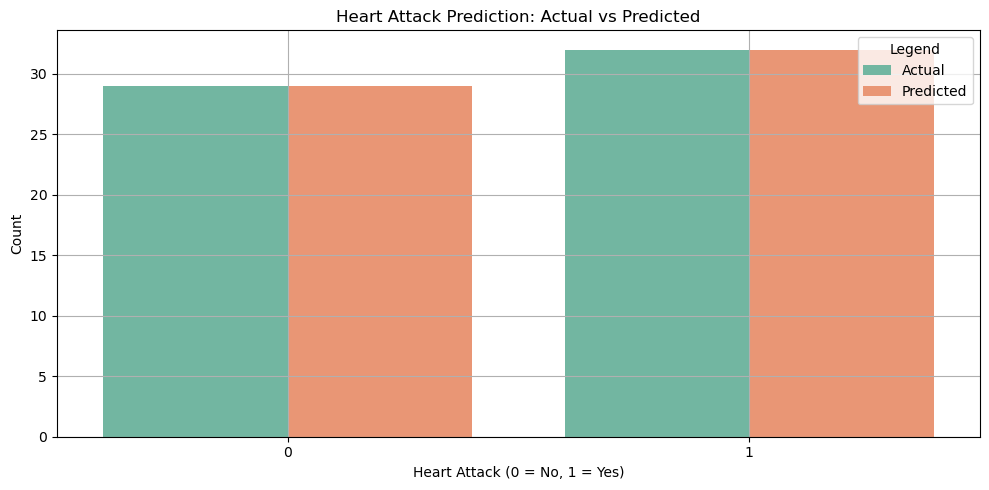

In [40]:
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
comparison_df = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
plt.figure(figsize=(10, 5))
sns.countplot(x='value', hue='variable', data=pd.melt(comparison_df), palette='Set2')
plt.title('Heart Attack Prediction: Actual vs Predicted')
plt.xlabel('Heart Attack (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.legend(title='Legend', labels=['Actual', 'Predicted'])
plt.grid(True)
plt.tight_layout()
plt.show()


<b>How well does the Random Forest model predict heart attack risk?</b>

In [41]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8360655737704918


<b>How does the Random Forest model perform in terms of false positives, false negatives, true positives, and true negatives?</b>

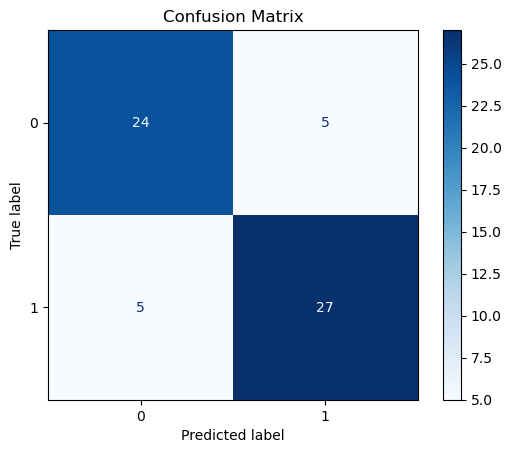

In [13]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()